In [168]:
import numpy as np
import matplotlib.pyplot as plt
!pip install imageio
from imageio import imread

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [169]:
#  Manipulasi Vektor/Matriks; Aljabar Linear (poin= 30)

In [170]:
##  a.Buat definisi Matriks M dan Vektor a, b, c. Salah satu package Python yang umum
##  digunakan untuk permasalahan terkait aljabar linear seperti ini adalah Numpy.
M = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9],
                [0, 2, 2],])
a = np.array([1, 1, 0]) 
b = np.array([-1, 2, 5])
c = np.array([0, 2, 3, 2]) 


In [171]:
##  b.Hitung dot product dari vektor a dan b. Simpan nilainya ke dalam variabel aDotb dan
##  tampilkan nilainya ke layar.

aDotb = np.dot(a,b)
print(aDotb)

1


In [172]:
##  c. Hitung element-wise product dari vektor a dan b. Tampilkan hasilnya ke layar.
aElementWiseb = np.multiply(a, b)
print(aElementWiseb)

[-1  2  0]


In [173]:
##  d. Hitung (aTb)Ma Tampilkan hasilnya ke layar.
aTb = np.dot(np.transpose(a), b)
aTbMa = np.dot(aTb, np.dot(M, a))
print(aTbMa)

[ 3  9 15  2]


In [174]:
##  e. Tanpa menggunakan loop, hitung perkalian element-wise dari tiap baris M dengan a.
##  Tampilkan hasilnya ke layar. Petunjuk: bisa menggunakan fungsi repmat().
MElementWisea = np.kron(M, a)
print(MElementWisea)

[[1 1 0 2 2 0 3 3 0]
 [4 4 0 5 5 0 6 6 0]
 [7 7 0 8 8 0 9 9 0]
 [0 0 0 2 2 0 2 2 0]]


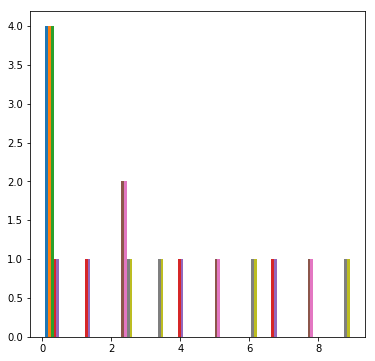

In [175]:
##  f. Tanpa menggunakan loop, urutkan semua nilai dari M yang baru (dari hasil e) terurut dari
##  nilai terkecil ke terbesar lalu buat dalam grafik/plot.
sorted = np.sort(MElementWisea)
num, bins, _ = plt.hist(sorted)
plt.show()

In [176]:
#  Basic image manipulation (poin=70)

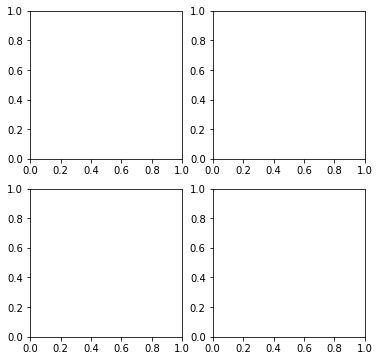

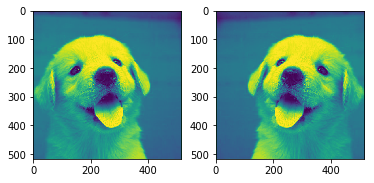

In [177]:
# a. Read in the images, image1.jpg and image2.jpg, as color images.
f, axarr = plt.subplots(2,2)
puppy = imread('puppy.jpg')
puppy = puppy.astype("float64")
puppy *= (255.0/puppy.max())

puppy2 = imread('puppy2.jpg')
puppy2 = puppy2.astype("float64")
puppy2 *= (255.0/puppy2.max())

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(puppy[:, : , 0])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(puppy2[:, : , 0])


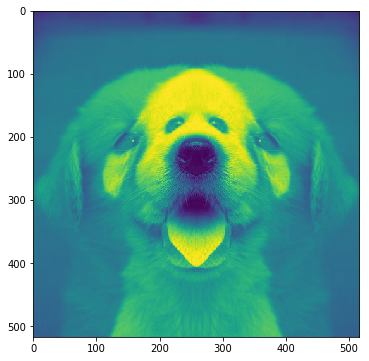

In [178]:
# c. Add the images together and re-normalize them to have minimum value 0 and maximum
# value 1. Display this new image.

added_images = np.add(puppy, puppy2)
added_images *= (255.0/added_images.max())
plt.imshow(added_images[:, : , 0])


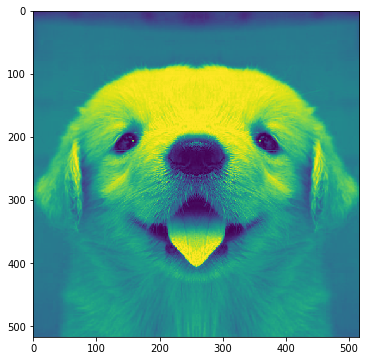

In [183]:
# d. Create a new image such that the left half of the image is the left half of image1 and the
# right half of the image is the right half of image2. Display this new image.

# image size is 517x517x3

# half_images_combined = np.zeros_like(added_images)
half_images = np.hstack((puppy[: , :puppy.shape[1]//2 , 0], puppy2[: , puppy2.shape[1]//2: , 0]))
plt.imshow(half_images)



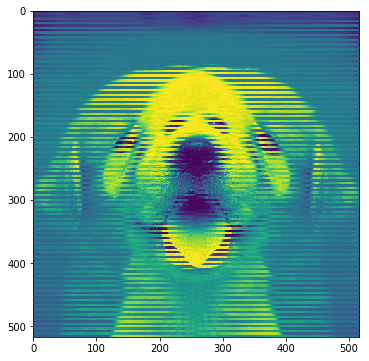

In [194]:
#  e. Using a for loop, create a new image such that every odd numbered row is the corre-
#  sponding row from image1 and the every even row is the corresponding row from image2.
#  (Hint: Remember that indices start at 0 and not 1 in Python). Display this new image.

odds_even = puppy[0:1 , : , 0]
height, width, cl = puppy.shape
for i in range(1, height):
    if(i % 2 == 0) : 
        odds_even = np.vstack((odds_even, puppy2[i-1:i , : , 0]))
    if(i % 2 == 1) : 
        odds_even = np.vstack((odds_even, puppy[i-1:i , : , 0]))
plt.imshow(odds_even)

In [196]:
# f. Accomplish the same task as part e without using a for-loop (the functions reshape and
# repmat may be helpful here).




In [200]:
# g. Convert the result from part f to a grayscale image. Display the grayscale image with a
# title
def grayConversion(image):
    grayValue = 0.07 * image[:,:,2] + 0.72 * image[:,:,1] + 0.21 * image[:,:,0]
    gray_img = grayValue.astype(np.uint8)
    return gray_img
grayscaled = grayConversion(odds_even)
plt.imshow(grayscaled)

IndexError: too many indices for array